## Diffusion Equation

Consider the following PDE
$$
\frac{\partial \: u(x,t)}{\partial t}  =
\frac{\partial^2 \: u(x,t)}{\partial x^2}  - u(x,t), \quad  x \in (0,1), t>0
$$

<br></br>
Subject to the following boundary and initial condtions
<br></br>

$$
u(0,t) = u(1,t) = 0,\quad t \geq  0\\
u(x,0) = \sin(\pi x),\quad  x \in [0,1]
$$


The Exact solution is
$$u(x,t) = \sin(\pi x) e^{-(\pi^2+1)t}$$


## Discretization

We will use the centeral difference formula to approximate the second derivative with respect to $x$. We will discretize the $x$ into $n+1$ interval with step size $h$. The time will be continuous.

$$
\frac{\partial^2 \: u(x,t)}{\partial x^2} =
\frac{ u_{i-1}(t) - 2u_{i}(t) + u_{i+1}(t) }{h^2}, \quad
i = 1, 2, 3, \dots , n
$$
</br>
Therefore, the PDE will be converted into a system of $n$ ODEs.
</br>
\begin{equation}
\frac{d \, u_i(t)}{dt} = \frac{1}{h^2}
\left[
  u_{i-1}(t) - 2u_{i}(t) + u_{i+1}(t)
\right] - u_i(t)
\end{equation}

Simplify

$$
\frac{d \, u_i(t)}{dt} = \frac{1}{h^2}
\left[
  u_{i-1}(t) - (2+h^2) u_{i}(t) + u_{i+1}(t)
\right]
$$

for $i=1$

$$
\frac{d \, u_1(t)}{dt} = \frac{1}{h^2}
\left[
  {u_{0}(t)} - (2+h^2) u_{1}(t) + u_{2}(t)
\right]
$$
But,
$$
{u_{0}(t)} = u(0, t) = 0
$$
Therefore,
$$
\frac{d \, u_1(t)}{dt} = \frac{1}{h^2}
\left[
   - (2+h^2) u_{1}(t) + u_{2}(t)
\right]
$$
</br>
for $i=2, 3, \dots, n-1$
$$
\frac{d \, u_2(t)}{dt} = \frac{1}{h^2}
\left[
  u_{1}(t) - (2+h^2) u_{2}(t) + u_{3}(t)
\right]
$$

$$
\frac{d \, u_3(t)}{dt} = \frac{1}{h^2}
\left[
  u_{2}(t) - (2+h^2) u_{3}(t) + u_{4}(t)
\right]
$$
$$
\vdots
$$
$$
\vdots
$$
$$
\frac{d \, u_{n-1}(t)}{dt} = \frac{1}{h^2}
\left[
  u_{n-2}(t) - (2+h^2) u_{n-1}(t) + u_{n}(t)
\right]
$$

For $i=n$
$$
\frac{d \, u_n(t)}{dt} = \frac{1}{h^2}
\left[
  u_{n-1}(t) - (2+h^2) u_{n}(t) + u_{n+1}(t)
\right]
$$

But,
$$
u_{n+1}(t) = u(1, t) = 0
$$

Therefore,
$$
\frac{d \, u_n(t)}{dt} = \frac{1}{h^2}
\left[
  u_{n-1}(t) - (2+h^2) u_{n}(t)
\right]
$$

###System of ODEs
We can rewrite the previous equations using vector notation.

</br>
$$
\mathbf{Y} =
\begin{bmatrix}
u_1(t)\\
u_2(t)\\
\vdots\\
\vdots\\
u_n(t)
\end{bmatrix}
\qquad
\mathbf{Y'} = \mathbf{F}(t,\mathbf{Y}) =
\begin{bmatrix}
u'_1(t)\\
u'_2(t)\\
\vdots\\
\vdots\\
u'_n(t)
\end{bmatrix}
=
\frac{1}{h^2} \:
\begin{bmatrix}
- (2+h^2) u_{1}(t) + u_{2}(t)\\
u_{1}(t) - (2+h^2) u_{2}(t) + u_{3}(t)\\
\vdots\\
\vdots\\
u_{n-1}(t) - (2+h^2) u_{n}(t)
\end{bmatrix}
$$


## Runge-Kutta
To solve the ODE, we will use a Runge-Kutta of order 4 with following Butcher's tableau

$$
\begin{array}{c|cccc}
0 & \\
1/2 & 1/2\\
1/2 & 0 & 1/2 \\
1 & 0 & 0 & 1 \\
\hline
& 1/6 & 1/3 & 1/3 & 1/6
\end{array}
$$

</br>
We will discretize the time using a step size of $\tau$. Therefore, our scheme will be as the following.

$$
\mathbf{Y}_{j+1} = \mathbf{Y}_j + \frac{\tau}{6}
\left(
\mathbf{K}_1  + 2\mathbf{K}_2 + 2\mathbf{K}_3  + \mathbf{K}_4
\right), \quad j=0, 1, 2, \dots
$$

Wehere
$$
\mathbf{K}_1 = \mathbf{F}(t_j , \mathbf{Y}_j)
$$

$$
\mathbf{K}_2 = \mathbf{F}(t_j + 0.5 \tau,\,
\mathbf{Y}_j + 0.5 \tau \mathbf{K_1})
$$

$$
\mathbf{K}_3 = \mathbf{F}(t_j + 0.5 \tau,\,
\mathbf{Y}_j + 0.5 \tau \mathbf{K_2})
$$

$$
\mathbf{K}_4 = \mathbf{F}(t_j + 0.5 \tau,\,
\mathbf{Y}_j + \tau \mathbf{K_3})
$$

## The Code Start Here

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt

In [ ]:
def u_exact(x, t):
  sin_x = np.sin(pi * x)
  exp_t = np.exp( -(pi**2 + 1) * t)
  return sin_x * exp_t

### Visiualize the exact solution

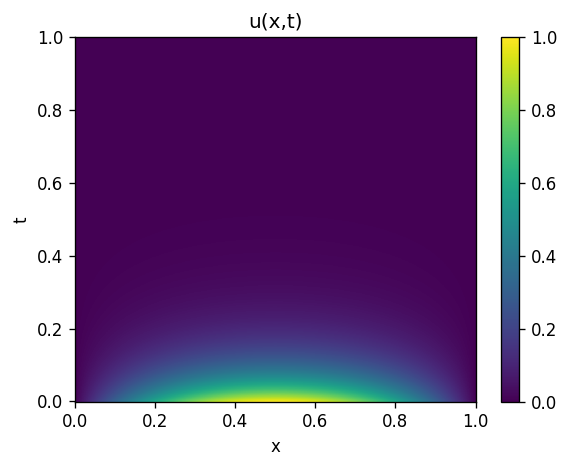

In [ ]:
x = np.arange(0, 1 + 0.001, 0.001)
t = np.arange(0, 1 + 0.001, 0.001)
xv, tv = np.meshgrid(x, t)
u = u_exact(xv, tv)

def create_colormap(x, t, u):
  figure = plt.figure(figsize=(5, 4), tight_layout=True, dpi=120)
  ax = figure.add_subplot(111)
  ax.set_title("u(x,t)")
  ax.set_xlabel("x")
  ax.set_ylabel("t")
  colormap = ax.pcolormesh(x, t, u, shading="auto")
  figure.colorbar(colormap)
  plt.show()

create_colormap(xv, tv, u)

### Define the ODE

In [ ]:
def dudt(u_left, u_middle, u_right, x_step_size):
  numerator = u_left - (2 + x_step_size**2) * u_middle + u_right
  denominator = x_step_size**2
  return numerator/denominator

### Define the initial and the boundary conditions

In [ ]:
u_t0 = lambda x: np.sin(pi * x)
u_x_left = lambda t: 0
u_x_right = lambda t: 0

### Define $\mathbf{F}(t, \mathbf{Y})$

In [ ]:
def fun(Y, x_step_size):
  output = []
  for i in range(0, len(Y)):
      if i == 0:
        output.append( dudt(0, Y[i], Y[i+1], x_step_size) )
      elif i == len(Y) - 1:
        output.append( dudt(Y[i-1], Y[i], 0, x_step_size) )
      else:
        output.append( dudt(Y[i-1], Y[i], Y[i+1], x_step_size) )

  return np.array(output)

### Main function

In [ ]:
def lines_RK4(x_start, x_end, x_step_size, t_start, t_end, t_step_size):
  x_axis = np.arange(x_start, x_end + x_step_size, x_step_size)
  t_axis = np.arange(t_start, t_end + t_step_size, t_step_size)
  u_approx = np.array( [ u_t0(x_axis) ] )#start with the initial condtion

  for j in range(1, len(t_axis)):
    u_previous = u_approx[-1]
    u_previous = u_previous[1: -1] # exclude the boundary
    k1 = fun(u_previous, x_step_size)
    k2 = fun(u_previous + 0.5 * t_step_size * k1, x_step_size)
    k3 = fun(u_previous + 0.5 * t_step_size * k2, x_step_size)
    k4 = fun(u_previous + t_step_size * k3, x_step_size)
    u_next = u_previous + (t_step_size / 6) * (k1 + 2*k2 + 2*k3 + k4)
    u_next = np.insert(u_next, 0, 0) #add the left boundary
    u_next = np.append(u_next, 0) #add the right boundary
    u_approx = np.concatenate((u_approx, np.expand_dims(u_next, axis=0)))

  xv, tv = np.meshgrid(x_axis, t_axis)
  create_colormap(xv, tv, u_approx)

  return u_approx

### Run the main function

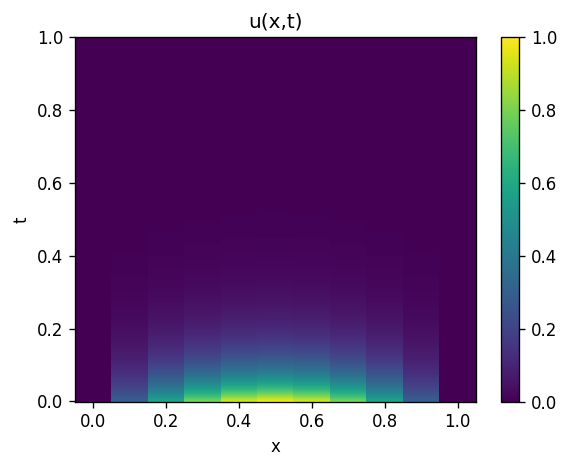

array([[0.00000000e+00, 3.09016994e-01, 5.87785252e-01, ...,
        5.87785252e-01, 3.09016994e-01, 1.22464680e-16],
       [0.00000000e+00, 3.05701023e-01, 5.81477901e-01, ...,
        5.81477901e-01, 3.05701023e-01, 0.00000000e+00],
       [0.00000000e+00, 3.02420635e-01, 5.75238231e-01, ...,
        5.75238231e-01, 3.02420635e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 6.51451136e-06, 1.23913370e-05, ...,
        1.23913370e-05, 6.51451136e-06, 0.00000000e+00],
       [0.00000000e+00, 6.44460605e-06, 1.22583692e-05, ...,
        1.22583692e-05, 6.44460605e-06, 0.00000000e+00],
       [0.00000000e+00, 6.37545087e-06, 1.21268282e-05, ...,
        1.21268282e-05, 6.37545087e-06, 0.00000000e+00]])

In [ ]:
lines_RK4(0, 1, 0.1, 0, 1, 0.001)

### Stability
Notice that we used large step size for $x$ and small step size for $t$ due to the stability of the method.

If we need a high resloution, then we need use a very small step size for time, but this will cause the program to run slower since, we are increasing the amount of computations.

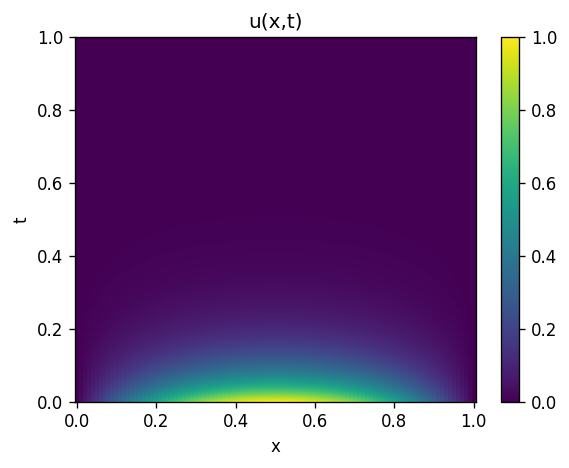

array([[0.00000000e+00, 3.14107591e-02, 6.27905195e-02, ...,
        6.27905195e-02, 3.14107591e-02, 1.22464680e-16],
       [0.00000000e+00, 3.13936939e-02, 6.27564059e-02, ...,
        6.27564059e-02, 3.13936939e-02, 0.00000000e+00],
       [0.00000000e+00, 3.13766379e-02, 6.27223109e-02, ...,
        6.27223109e-02, 3.13766379e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 5.98816515e-07, 1.19704207e-06, ...,
        1.19704207e-06, 5.98816515e-07, 0.00000000e+00],
       [0.00000000e+00, 5.98491183e-07, 1.19639173e-06, ...,
        1.19639173e-06, 5.98491183e-07, 0.00000000e+00],
       [0.00000000e+00, 5.98166027e-07, 1.19574174e-06, ...,
        1.19574174e-06, 5.98166027e-07, 0.00000000e+00]])

In [ ]:
lines_RK4(0, 1, 0.01, 0, 1, 0.00005)

### Resolving the stability issue
To resolve the stability problem, we need to use implicit Runge-Kutta instead of the explicit Runge-Kutta that we have used.

### Implicit Runge-Kutta (IRK)

Let us consider the thrid order implicit Runge-Kutta method with the following Butcher's tabealu.

$$
\begin{array}{c|cc}
  1/2 & 1/2 & 0\\
  1 & 1/2 & 1/2 \\
  \hline
  & 1/2 & 1/2
\end{array}
$$

Therefore,

$$
\mathbf{Y}_{i+1} = \mathbf{Y}_i + \frac{\tau}{2} (\mathbf{K}_1 + \mathbf{K}_2), \quad \text{for } i =1, 2, 3, \dots
$$

Where

$$
\mathbf{K}_1 = \mathbf{F}(t_j +  \frac{1}{2} \tau, \: \mathbf{Y}_j + \frac{1}{2} \tau \mathbf{K}_1)
$$

$$
\mathbf{K}_2 = \mathbf{F}(t_j + \tau, \: \mathbf{Y}_j + \frac{\tau}{2} \mathbf{K_1} + \frac{\tau}{2} \mathbf{K}_2)  
$$
<br></br>
Notice that we must solve two linear systems sequentially.  First we solve a linear system to find $\mathbf{K}_1$ then use it to solve a linear system to find $\mathbf{K}_2$.
<br></br>

As we have seen eariler,

$$
\mathbf{Y'} = \mathbf{F}(t,\mathbf{Y})
=
\frac{1}{h^2} \:
\begin{bmatrix}
- (2+h^2) u_{1}(t) + u_{2}(t)\\
u_{1}(t) - (2+h^2) u_{2}(t) + u_{3}(t)\\
\vdots\\
\vdots\\
u_{n-1}(t) - (2+h^2) u_{n}(t)
\end{bmatrix}
$$

<br></br>
But this also can be written as the following. Let $\lambda = -(2+h^2)$

<br></br>

$$
\mathbf{F}(t, \mathbf{Y}) =
\frac{1}{h^2}
\begin{bmatrix}
\lambda & 1 & 0 & 0 & \dots & 0\\
1 & \lambda & 1 & 0 &  & \vdots\\
0 & 1 & \lambda & 1 & \ddots & \\
\vdots & 0 & \ddots & \ddots & \ddots & 0\\
\vdots & 0 & \ddots & \ddots & \ddots & 1\\
0 & \dots & \dots & 0 & 1 & \lambda
\end{bmatrix}
\begin{bmatrix}
u_1(t)\\
u_2(t)\\
\vdots\\
\vdots\\
u_{n-1}(t)\\
u_n(t)
\end{bmatrix}
$$

<br></br>
$$
\text{Let } \, \mathbf{A} =
\begin{bmatrix}
\lambda & 1 & 0 & 0 & \dots & 0\\
1 & \lambda & 1 & 0 &  & \vdots\\
0 & 1 & \lambda & 1 & \ddots & \\
\vdots & 0 & \ddots & \ddots & \ddots & 0\\
\vdots & 0 & \ddots & \ddots & \ddots & 1\\
0 & \dots & \dots & 0 & 1 & \lambda
\end{bmatrix}
$$
Therefore,

$$
\mathbf{F}(t, \mathbf{Y}) = \frac{1}{h^2} \mathbf{A} \mathbf{Y}
$$


We can use the above expression to find the linear system for $\mathbf{K}_1$

$$
\mathbf{K}_1 = \mathbf{F}(t_j +  \frac{1}{2} \tau, \: \mathbf{Y}_j + \frac{1}{2} \tau \mathbf{K}_1) = \frac{1}{h^2} \mathbf{A}
\left(
  \mathbf{Y}_j + \frac{1}{2} \tau \mathbf{K}_1
\right)
$$

$$
h^2 \mathbf{K}_1 = \mathbf{AY}_j + \frac{\tau}{2} \mathbf{AK}_1
\Rightarrow h^2 \mathbf{K}_1 - \frac{\tau}{2} \mathbf{AK}_1 = \mathbf{AY}_j
$$

$$
\left( h^2 \mathbf{I} - \frac{\tau}{2} \mathbf{A} \right) \mathbf{K}_1 = \mathbf{AY}_j
$$

We solve the linear system above to find $\mathbf{K}_1$

<br></br>
Similarly, we can write the linear system for $\mathbf{K}_2$ as the following.

$$
\left( h^2 \mathbf{I} - \frac{\tau}{2} \mathbf{A} \right) \mathbf{K}_2 = \mathbf{A} \left( \mathbf{Y}_j + \frac{\tau}{2} \mathbf{K}_1 \right)
$$

### Notes

The implicit Runge-Kutta method that we have seen its Butcher's tableau earlier is called diagonally implicit Rugne-Kutta or semi-implicit since we are computing the value of the $\mathbf{K}$s  sequentially, unlike the fully implicit Runge-Kutta methods where we find all $\mathbf{K}$s at the same time.

The method that we have used is a special case of Qin and Zhang's Diagonally Implicit Runge-Kutta method, which has the following Butcher's tableaue.

$$
\begin{array}{c|cc}
  x & x & 0\\
  1 & 1-x & x \\
  \hline
  & 1-x & x
\end{array}
$$

The method is A-stable when $x \ge \frac{1}{4}$.

For our earlier Runge-Kutta method, we have used $x = \frac{1}{2}$



## The Code Start Here

In [ ]:
def lines_IRK3(x_start, x_end, x_step_size, t_start, t_end, t_step_size):
  x_axis = np.arange(x_start, x_end + x_step_size, x_step_size)
  t_axis = np.arange(t_start, t_end + t_step_size, t_step_size)
  u_approx = np.array( [ u_t0(x_axis) ] )#start with the initial condtion
  row_num, col_num = len(x_axis) - 2, len(x_axis) - 2 #exclude the boundary

  #----Butcher's tableau parameters---
  a11 = 0.5
  a21 = -0.5
  a22 = 2
  d1 = -0.5

  d2 = 3/2
  #----Initialize the matrix A-----
  A = np.zeros((row_num, col_num))

  #----modify the entries-----
  #first row
  A[0][0] =  -(2 + x_step_size**2)
  A[0][1] = 1

  #last row
  A[-1][-1] =  -(2 + x_step_size**2)
  A[-1][-2] = 1

  #rest of the rows
  for i in range(1, len(A) - 1):
    A[i][i] = -(2 + x_step_size**2)
    A[i][i+1] = 1
    A[i][i-1] = 1

  #create the matrix M
  I = np.identity(col_num)
  M1 = (x_step_size**2) * I - a11 * t_step_size * A
  M2 = (x_step_size**2) * I - a22 * t_step_size * A

  for j in range(1, len(t_axis)):
    u_previous = u_approx[-1]
    u_previous = u_previous[1: -1] # exclude the boundary
    b = np.matmul(A, u_previous)
    k1 = np.linalg.solve(M1, b)

    u_previous_modified = u_previous + a21 * t_step_size * k1
    b2 = np.matmul(A, u_previous_modified)
    k2 = np.linalg.solve(M2, b2)

    u_next = u_previous +  t_step_size * ( d1 * k1 + d2 * k2)
    u_next = np.insert(u_next, 0, 0) #add the left boundary
    u_next = np.append(u_next, 0) #add the right boundary
    u_approx = np.concatenate((u_approx, np.expand_dims(u_next, axis=0)))

  xv, tv = np.meshgrid(x_axis, t_axis)
  create_colormap(xv, tv, u_approx)

  return u_approx

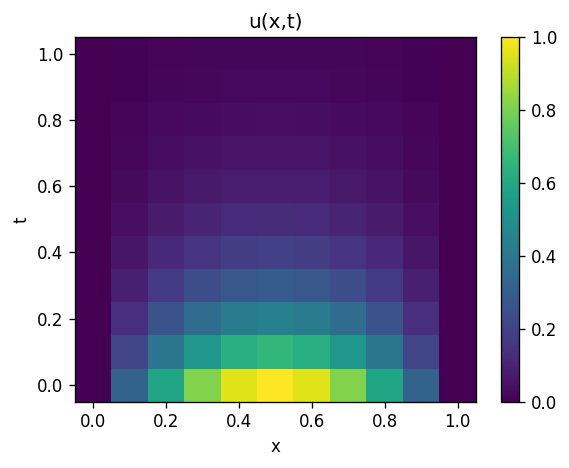

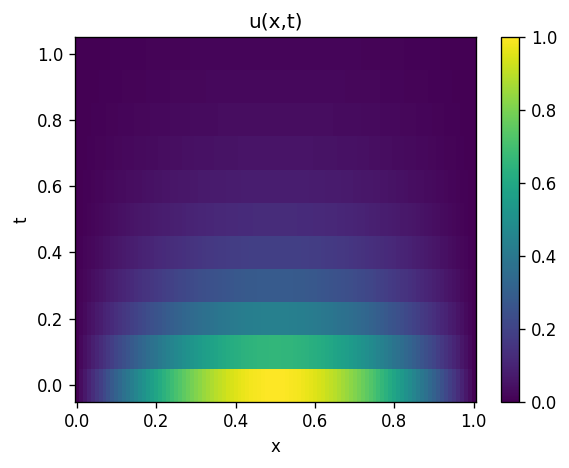

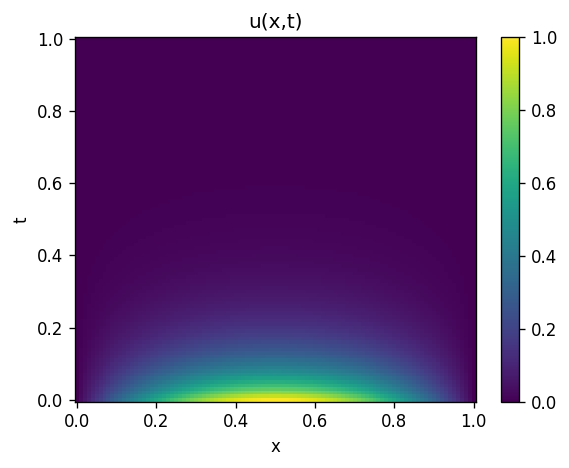

array([[0.00000000e+00, 3.14107591e-02, 6.27905195e-02, ...,
        6.27905195e-02, 3.14107591e-02, 1.22464680e-16],
       [0.00000000e+00, 2.86063908e-02, 5.71845505e-02, ...,
        5.71845505e-02, 2.86063908e-02, 0.00000000e+00],
       [0.00000000e+00, 2.60523978e-02, 5.20790851e-02, ...,
        5.20790851e-02, 2.60523978e-02, 0.00000000e+00],
       ...,
       [0.00000000e+00, 3.28679524e-06, 6.57034681e-06, ...,
        6.57034681e-06, 3.28679524e-06, 0.00000000e+00],
       [0.00000000e+00, 2.99334851e-06, 5.98374295e-06, ...,
        5.98374295e-06, 2.99334851e-06, 0.00000000e+00],
       [0.00000000e+00, 2.72610085e-06, 5.44951138e-06, ...,
        5.44951138e-06, 2.72610085e-06, 0.00000000e+00]])

In [ ]:
# Try different discretization
lines_IRK3(0, 1, 0.1, 0, 1, 0.1)
lines_IRK3(0, 1, 0.01, 0, 1, 0.1)
lines_IRK3(0, 1, 0.01, 0, 1, 0.01)